In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as matplt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR-data.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#check for missing data
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [6]:
df = df.rename(columns={'satisfaction_level':'satisfaction',
                       'last_evaluation':'evaluation',
                       'number_project':'projectCount',
                       'average_monthly_hours':'averageMonthlyHours',
                       'time_spend_company':'yearsAtCompany',
                       'Work_accident':'workAccident',
                       'promotion_last_5years':'promotion',
                       'sales':'department',
                       'left':'turnover'})

In [10]:
#Move the response variable to the front of the table
front = df['turnover']
df.drop(labels=['turnover'],axis=1, inplace=True)
df.insert(0,'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [11]:
#check the datatypes
df.dtypes

turnover                  int64
satisfaction            float64
evaluation              float64
projectCount              int64
average_montly_hours      int64
yearsAtCompany            int64
workAccident              int64
promotion                 int64
department               object
salary                   object
dtype: object

In [15]:
#check the distribution of the classes
df['turnover'].value_counts()/df.size * 1000

0    76.191746
1    23.808254
Name: turnover, dtype: float64

In [16]:
df.size

149990

In [19]:
turnover_summary = df.groupby('turnover')

In [20]:
turnover_summary.mean()

,satisfaction,evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,turnover,satisfaction,evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


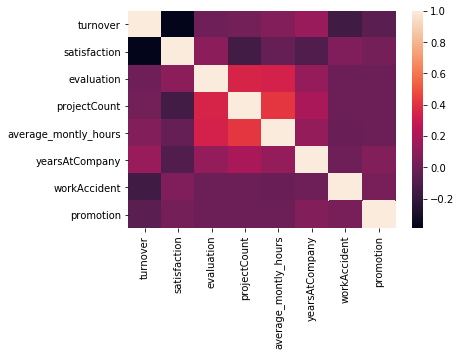

In [22]:
# Correlation 
corr = (df.corr())
sns.heatmap(corr, xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
corr

### There is a positove correlation between evaluation and project count, project count and average_monthly_hours and between average_monthly_hours and evaluation
### Neagative correlated feature : satisfaction vs turnover


## EDA

Text(0, 0.5, 'Employee Count')

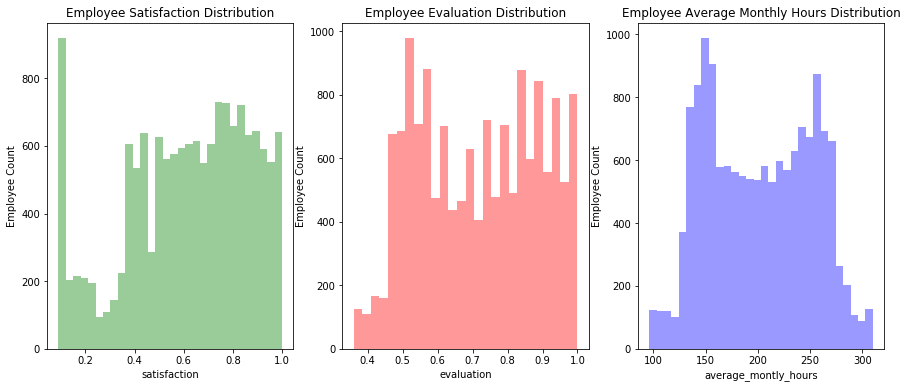

In [25]:
f, axes = plt.subplots(ncols=3, figsize = (15,6))

#Emp Satisfaction
sns.distplot(df.satisfaction, kde=False, color='g', ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel("Employee Count")

#Emp Evaluation
sns.distplot(df.evaluation, kde=False, color='r', ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel("Employee Count")

#Emp Average Monthly hours
sns.distplot(df.average_montly_hours, kde=False, color='b', ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel("Employee Count")





#### Distribution for Evaluation and Average_Monthly_Hours are similar. It is a bimodal distribution
#### There is a huge spike for employees with low satisfaction and high satisfaction

### Salary Vs turnover

Text(0.5, 1.0, 'Employee Salary Turnover Distribution')

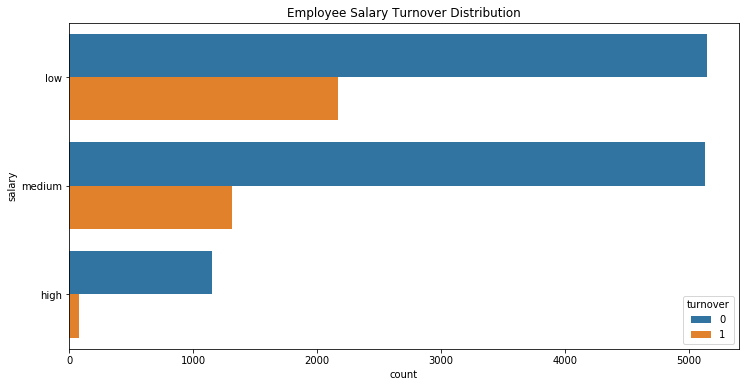

In [27]:
f, ax = plt.subplots(figsize = (12,6))
sns.countplot(y='salary',hue='turnover',data=df).set_title("Employee Salary Turnover Distribution")

### Majority of the employees who left had medium or low salary

### Department Vs Turnover

Text(0.5, 1.0, 'Employee Department Turnover ')

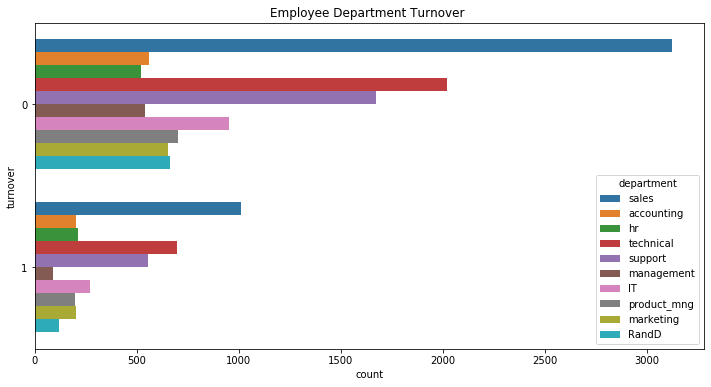

In [28]:
f, ax = plt.subplots(figsize = (12,6))
sns.countplot(y='turnover',hue='department',data=df).set_title("Employee Department Turnover ")

### Sales, Technical and Support were the top 3 departments with maximum turnover

### Turnover Vs Project Count

[Text(0, 0.5, 'Percent')]

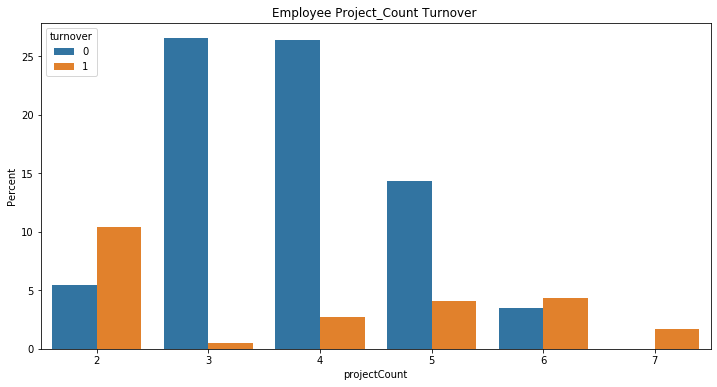

In [33]:
f, ax = plt.subplots(figsize = (12,6))
sns.barplot(x='projectCount',y="projectCount", hue='turnover',data=df, estimator=lambda x: len(x) / len(df) * 100).set_title("Employee Project_Count Turnover ")
ax.set(ylabel="Percent")

#### Most employees who left had project counts between 3 nd 4

### Turnover Vs Evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

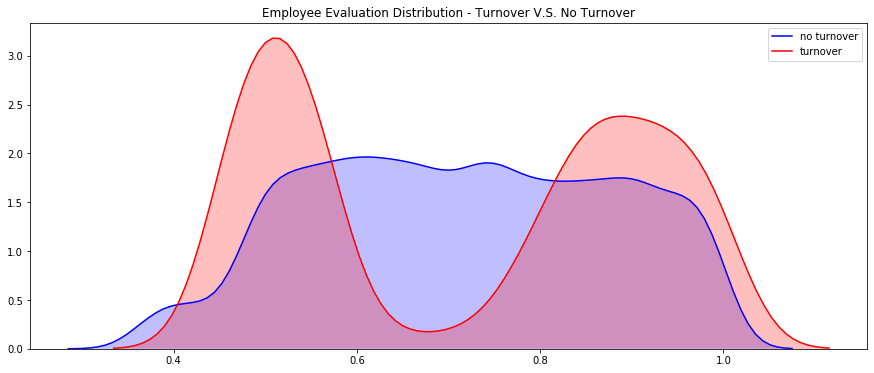

In [34]:
fig = plt.figure(figsize=(15,6))
ax = sns.kdeplot(df.loc[(df['turnover']==0), 'evaluation'], color='b',shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover']==1), 'evaluation'], color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

#### Employees that had low evaluation tend to leave the company but those with high evaluation also had a high turnover

### Turnover vs Average_Monthly_Hours

Text(0.5, 1.0, 'Employee Average_Monthly_Hours Distribution - Turnover V.S. No Turnover')

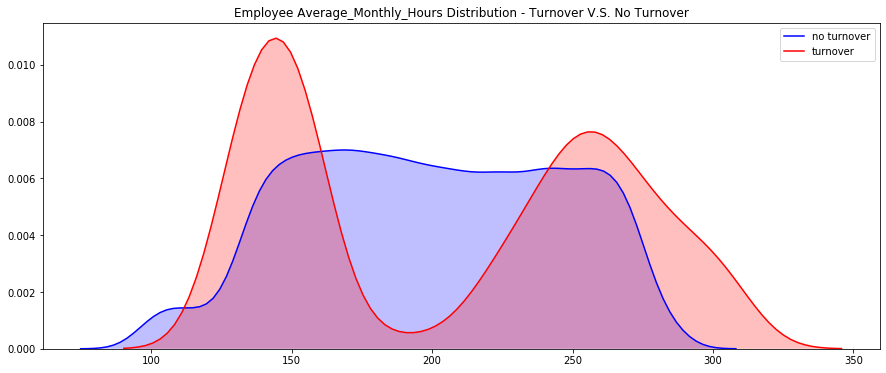

In [35]:
fig = plt.figure(figsize=(15,6))
ax = sns.kdeplot(df.loc[(df['turnover']==0), 'average_montly_hours'], color='b',shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover']==1), 'average_montly_hours'], color='r',shade=True, label='turnover')
plt.title('Employee Average_Monthly_Hours Distribution - Turnover V.S. No Turnover')

### Turnover Vs Satisfaction

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

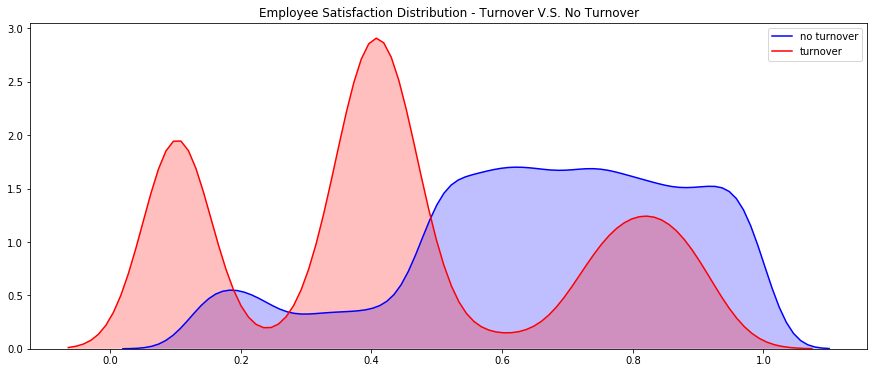

In [36]:
fig = plt.figure(figsize=(15,6))
ax = sns.kdeplot(df.loc[(df['turnover']==0), 'satisfaction'], color='b',shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover']==1), 'satisfaction'], color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

#### Employees who had really low satisfaction levels (0.2 or less) left the company more

### ProjectCount VS AverageMonthlyHours

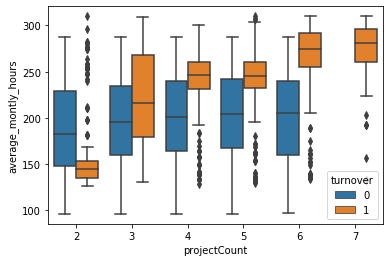

In [37]:
sns.boxplot(x='projectCount',y='average_montly_hours', hue='turnover', data=df)

#### Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.

### Project Count Vs Evaluation




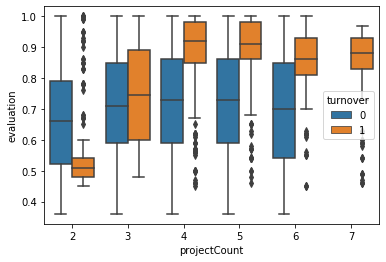

In [38]:
sns.boxplot(x='projectCount',y='evaluation', hue='turnover', data=df)

#### There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.

### Satisfaction Vs Evaluation

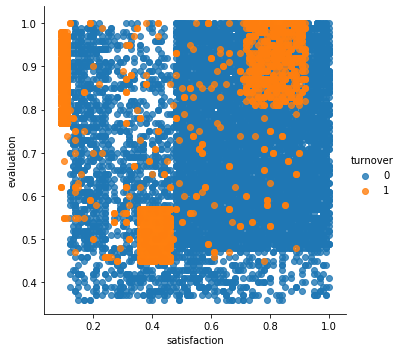

In [39]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

#### Cluster 1 - satisfaction was below 0.2 but evaluation was high. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.
#### Cluster 2 - satisfaction and evaluation both low. This could be seen as employees who were badly evaluated and felt bad at work.
#### Cluster 3 - Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. but still left as they found a better opportunity ?

### Turnover Vs Years at Company

[Text(0, 0.5, 'Percent')]

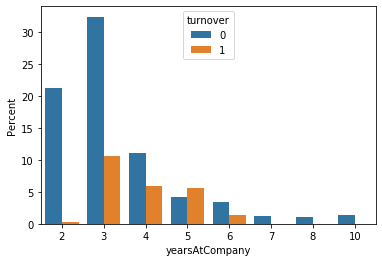

In [40]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## Modelling

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler


In [42]:
#Create dummy variables for 'department' and 'salary' since they are categorical
department = pd.get_dummies(data=df.department, drop_first=True, prefix='dep')
salary = pd.get_dummies(data=df.salary, drop_first=True, prefix='sal')
df.drop(['department','salary'],axis=1,inplace=True)
df = pd.concat([df,department,salary],axis=1)

In [43]:
df.head(10)

,turnover,satisfaction,evaluation,projectCount,average_montly_hours,yearsAtCompany,workAccident,promotion,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_low,sal_medium
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
5,1,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,1,0,0,1,0
6,1,0.10,0.77,6,247,4,0,0,0,0,0,0,0,0,1,0,0,1,0
7,1,0.92,0.85,5,259,5,0,0,0,0,0,0,0,0,1,0,0,1,0
8,1,0.89,1.00,5,224,5,0,0,0,0,0,0,0,0,1,0,0,1,0
9,1,0.42,0.53,2,142,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [46]:
#Train and Test splits
y=df['turnover']
X = df.drop('turnover',axis=1)
rs = RobustScaler()
X = rs.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=111,stratify=y)

In [48]:
#Logistic Regression
model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train,y_train)
accuracy_score(y_test,model.predict(X_test))

0.7922666666666667

In [52]:
# Imbalanced class, Resample data 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))
 

# Upsample using SMOTE
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (11249, 18) (11249,)
Upsampled shape: (17142, 18) (17142,)
SMOTE sample shape: (17142, 18) (17142,)
Downsampled shape: (5356, 18) (5356,)


In [54]:
from sklearn.model_selection import cross_val_score

#Choose which method to use
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data:
0.428407536046984
The best F1 Score for Upsampled data:
0.7796352030529297
The best F1 Score for SMOTE data:
0.7834478164310049
The best F1 Score for Downsampled data:
0.7839734047181701


0.6138131091624287

### Logistic Regression

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.92      0.75      0.82      2857
           1       0.49      0.80      0.61       893

    accuracy                           0.76      3750
   macro avg       0.71      0.77      0.72      3750
weighted avg       0.82      0.76      0.77      3750



### RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')

rf_result.mean()

0.9862833463759276

In [57]:

rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2857
           1       0.99      0.96      0.97       893

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



### GBM Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()  

gbc = gbc.fit(x_train_sm,y_train_sm)

gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.9634886165719394

In [61]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2857
           1       0.93      0.94      0.93       893

    accuracy                           0.97      3750
   macro avg       0.95      0.96      0.96      3750
weighted avg       0.97      0.97      0.97      3750



### ROC curve

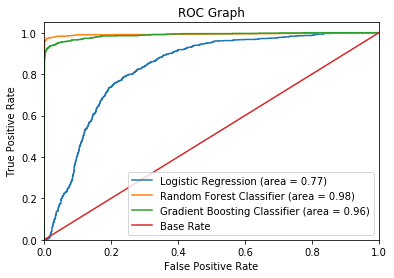

In [64]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Feature Importance using Random Forest

In [77]:
df.columns[1:]

Index(['satisfaction', 'evaluation', 'projectCount', 'average_montly_hours',
       'yearsAtCompany', 'workAccident', 'promotion', 'dep_RandD',
       'dep_accounting', 'dep_hr', 'dep_management', 'dep_marketing',
       'dep_product_mng', 'dep_sales', 'dep_support', 'dep_technical',
       'sal_low', 'sal_medium'],
      dtype='object')

In [79]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = df.columns[1:],
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction,0.281721
1,yearsAtCompany,0.240962
2,projectCount,0.161788
3,average_montly_hours,0.137077
4,evaluation,0.121015
5,workAccident,0.020118
6,sal_low,0.008759
7,dep_technical,0.004696
8,sal_medium,0.004584
9,dep_sales,0.003941


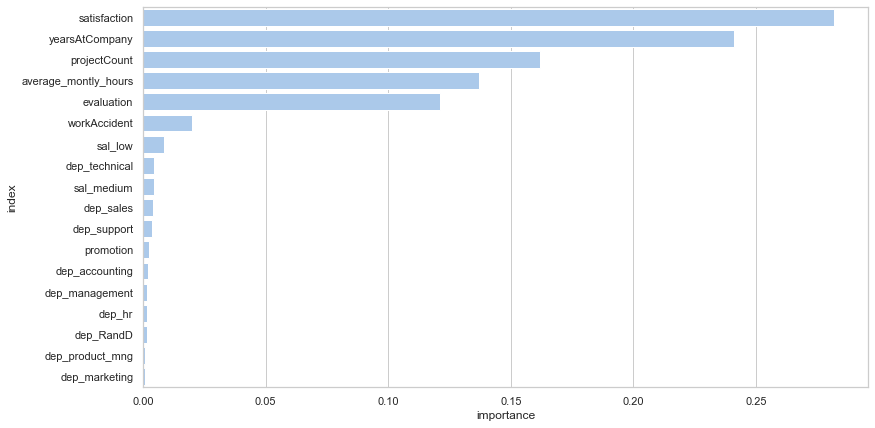

In [82]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

### Top 3 features
#### Satisfaction, YearsAtCompany and ProjectCount

### Summary




Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
Employees with either really high or low evaluations should be taken into consideration for high turnover rate
Employees with low to medium salaries are the bulk of employee turnover
Employees that had 2,6, or 7 project count was at risk of leaving the company
Employee satisfaction is the highest indicator for employee turnover.
Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate
Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.
